# Case Study - Diamond Price Prediction


## Understanding the 4C's
- Cut ( Shape)
- color
- Clarity (trog suốt)
- Carat ( đơn vị đo, kt)

## Problem Statement

build a system which can take features of diamond like carat, cut, color, clarity, and predicts the PRICE OF DIAMOND

## Case Study Agenda

- in thiss notebook, you will lear
- 1. how to split the given data into train and Test?
  2. how to perform Feature Engineering of Categorical and Numerical Features
  3. Categorical Columns - OneHotEncoding and LabelEncoding
  4. Numerical Columns - Standardization and Normalization
  5. How to build ML models that predict PRICE OF A DIAMOND
- 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 - Load the data

In [6]:
df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/File CSV/diamonds.csv")

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Data Description
- price	price in US dollars ($ 326 - $ 18,823)
- carat	weight of the diamond (0.2 - 5.01)
- cut	quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color	diamond colour, (J (worst) to D (best))
- clarity	a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x	length in mm (0 - 10.74)
- y	width in mm (0 - 58.9)
- z	depth in mm (0 - 31.8)
- depth	total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)
- table	width of top of diamond relative to widest point (43 - 95)
- 

## Step 2 - Exploratory Data Analysis

In [7]:
df.shape

(53940, 10)

In [2]:
df.columns

NameError: name 'df' is not defined

In [8]:
df.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

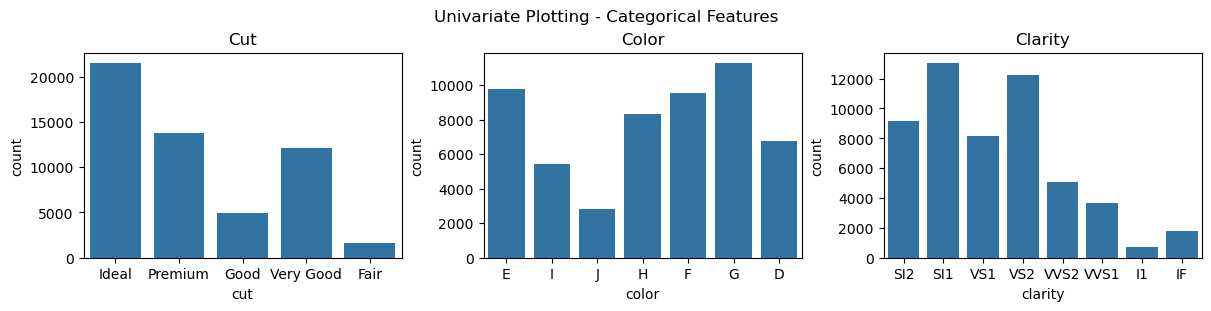

In [9]:
# Univariate - Categorical Analysis

fig, axs = plt.subplots(1, 3,figsize = (12,3), constrained_layout = True)

fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Cut")
sns.countplot(data = df, x = "cut", ax = axs[0])

axs[1].set_title("Color")
sns.countplot(data = df, x = "color", ax = axs[1])

axs[2].set_title("Clarity")
sns.countplot(data = df, x = "clarity", ax = axs[2])

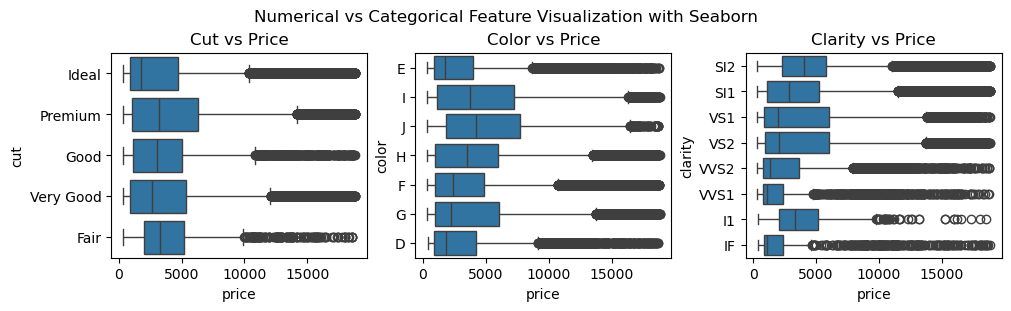

In [10]:

# Bivariate - Categorical vs Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x='price', y='cut', ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df, x='price', y='color', ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df, x='price', y='clarity', ax=axs[2])

plt.show()

<Axes: title={'center': 'Table'}, xlabel='table', ylabel='Count'>

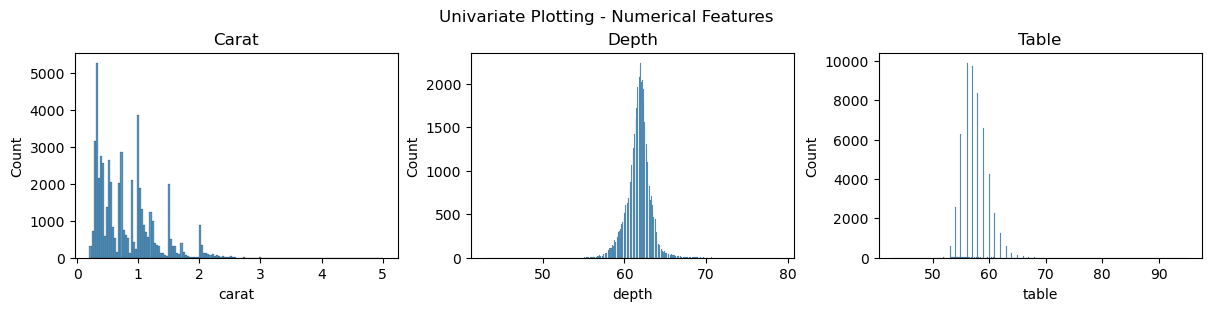

In [11]:

# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Carat")
sns.histplot(data=df, x='carat', ax=axs[0])

axs[1].set_title("Depth")
sns.histplot(data=df, x='depth', ax=axs[1])

axs[2].set_title("Table")
sns.histplot(data=df, x='table', ax=axs[2])

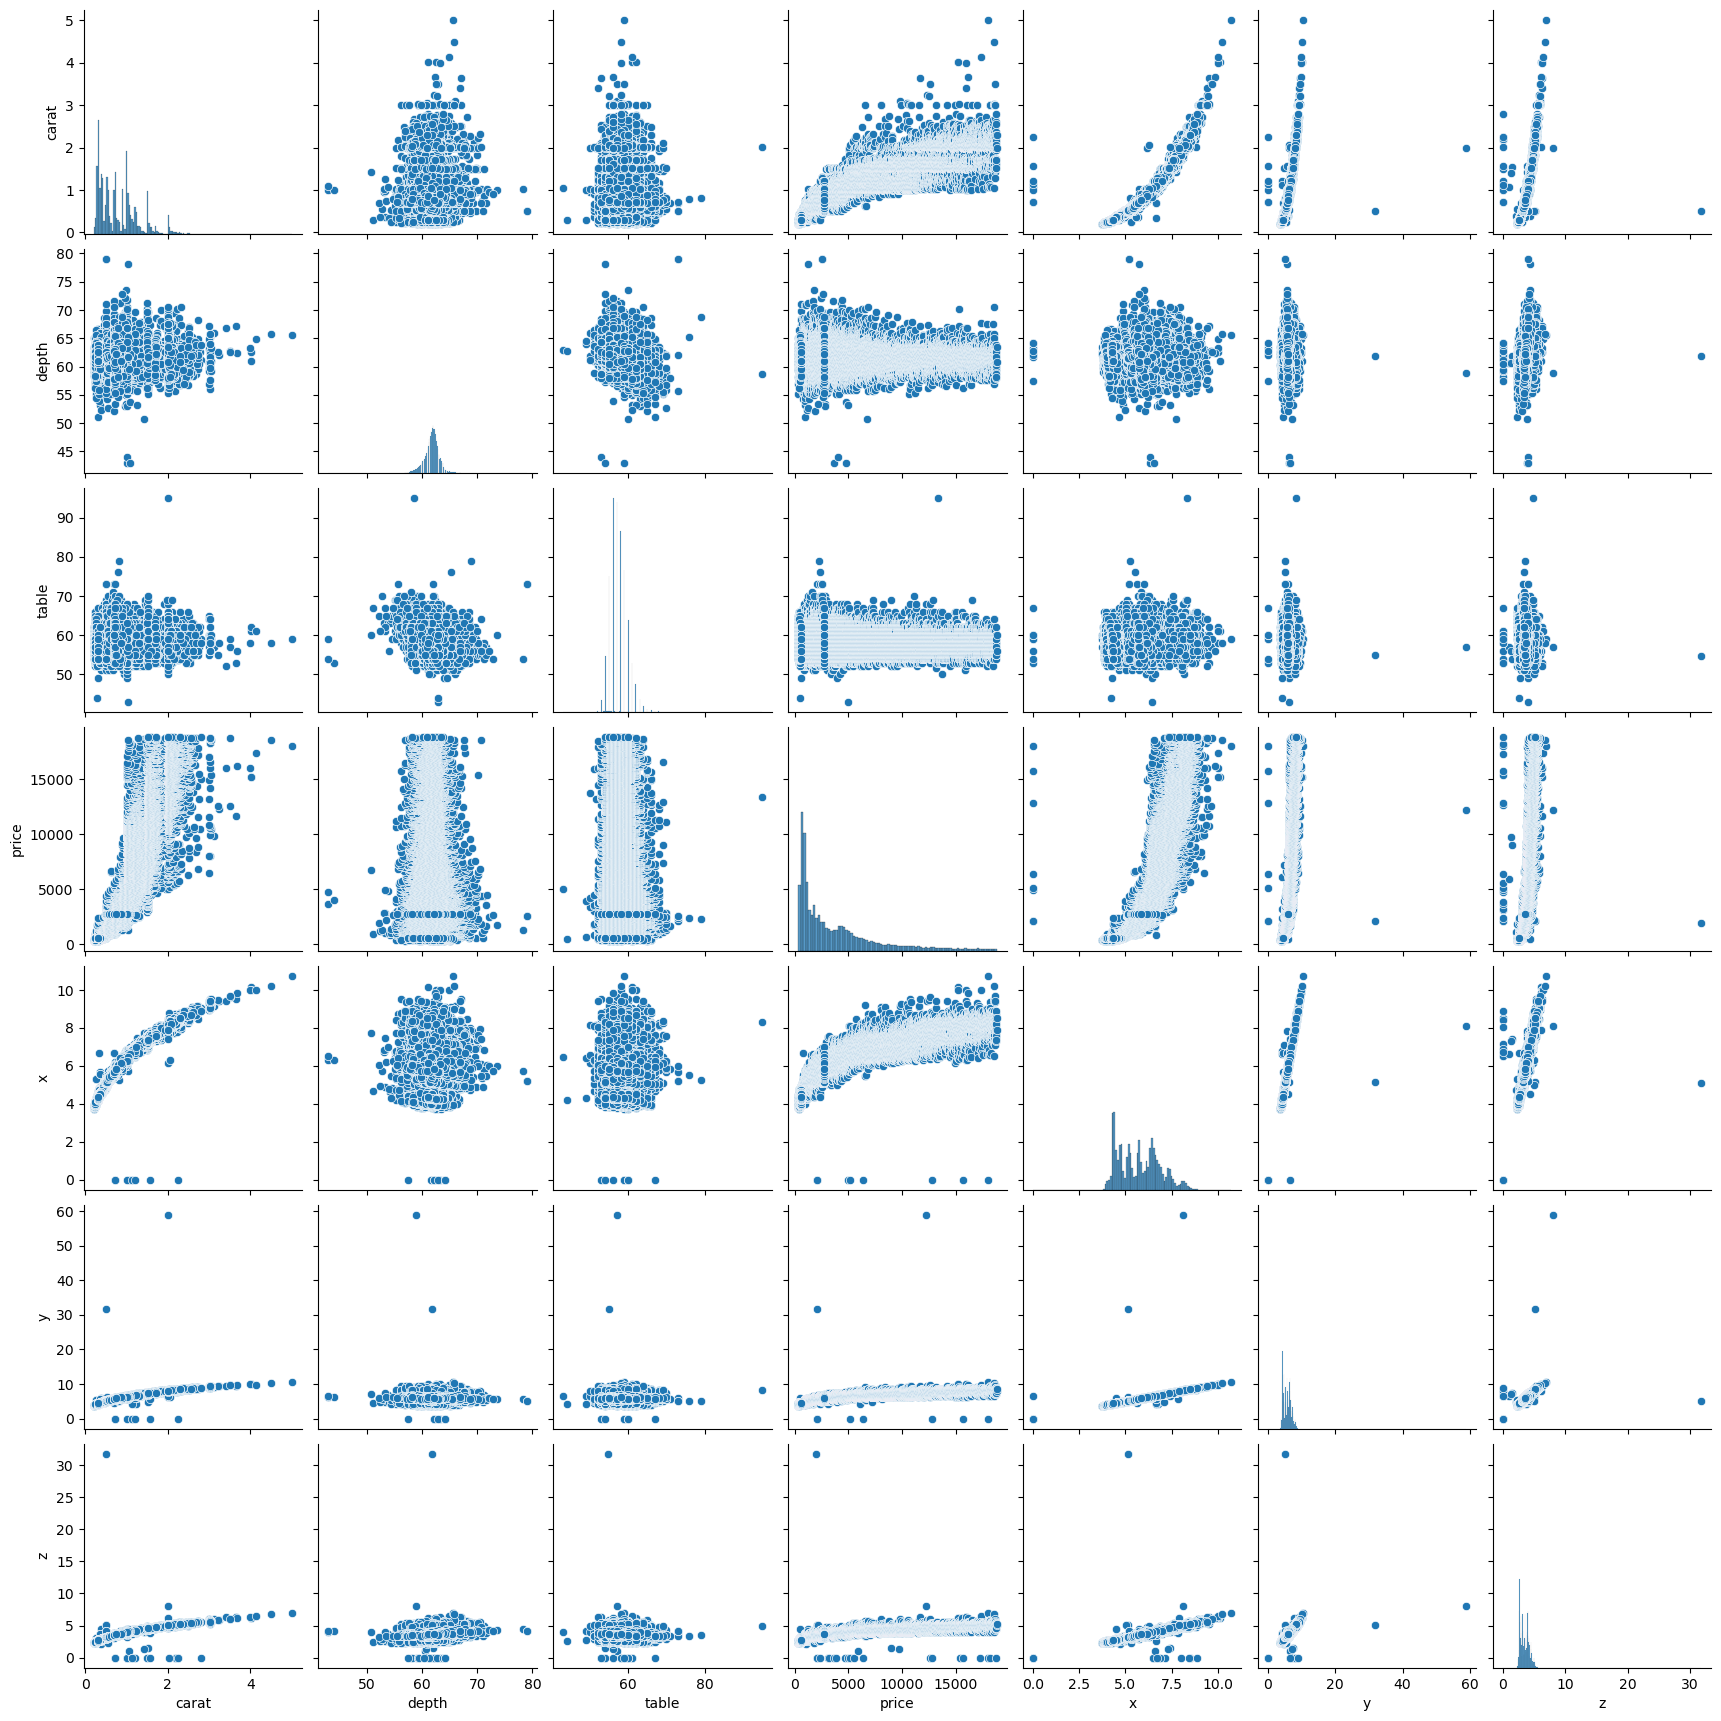

In [12]:
# bivariate - Numerical vs Numerical Analysis

sns.pairplot(data = df)

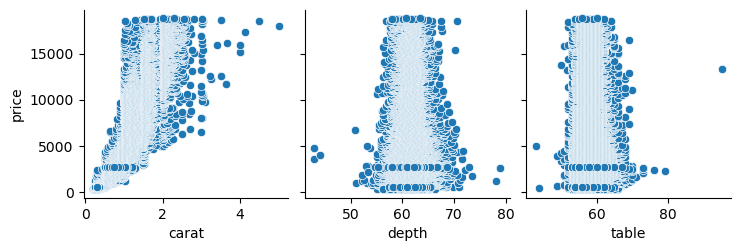

In [13]:
sns.pairplot(data = df, 
             x_vars = ['carat', 'depth', 'table'],
             y_vars = 'price')

<Axes: title={'center': 'Z'}, xlabel='z', ylabel='Count'>

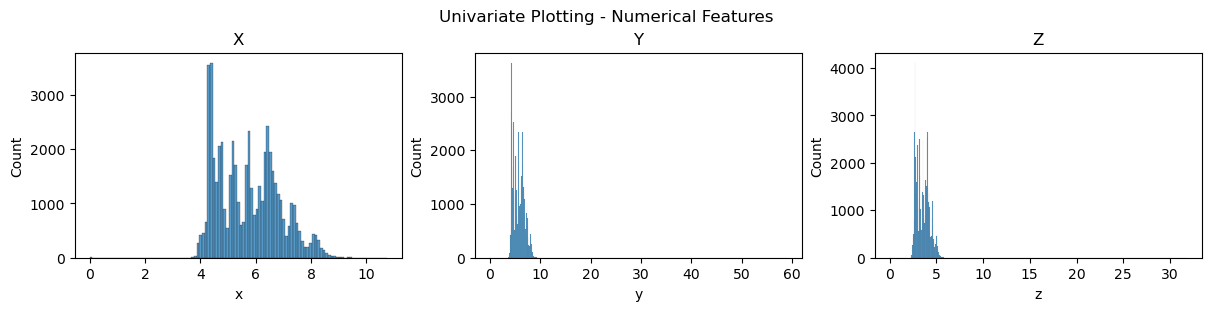

In [14]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("X")
sns.histplot(data=df, x='x', ax=axs[0])

axs[1].set_title("Y")
sns.histplot(data=df, x='y', ax=axs[1])

axs[2].set_title("Z")
sns.histplot(data=df, x='z', ax=axs[2])

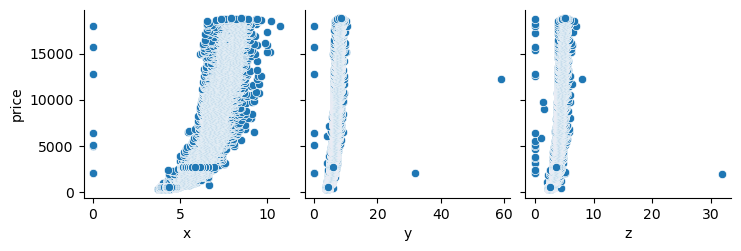

In [12]:
# Bivariate - Numerical vs Numerical Analysis

sns.pairplot(data=df,
           x_vars=['x', 'y', 'z'],
           y_vars='price')

## Data Preparation and Model Building Pipeline
1. Identifying the inputs(X) and outpyt(Y)
2. Split into train the test (X_train, test, y_train, test
3. Data preparaion : data Cleaning and Feature Engineering.
   - Clean the training data
   - preprocess the trainning data(X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data(X_test_transformed)
6. predict on unseen data
7. evaluate the model performance 

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Step 3 - Segregate inputs(X) and Output(y)

In [14]:
# Define the predictors (X) and target variable(y)

X = df.drop(columns = ["price"]) 
# X là df trừ cột price
y = df['price']


## Step 4 - Split the Data into Train and Test

In [15]:
from sklearn.model_selection import train_test_split
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


## Step 5 - Applying Data Preparation on Training Data
- We will follow the below mentioned strategy
- 1. Separate Numerical and Categorical Features
  2. Feature Engineering /  Extraction / Transformation
  3. - Applying Standardization on Numerical Features
     - Apply LabelEncoding on Categorical Features

In [16]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

### Separate Numerical and Categorical Features

In [17]:
# separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ["float64", "int64"])

In [19]:
X_train_cat.head(15)

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2
35613,Premium,I,VS1
23751,Very Good,G,SI1
18773,Premium,E,VS1
18115,Good,G,VVS2
12921,Good,E,VS2


In [20]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


## Numerical Feature transformation
1. Normalization ( khi biết giới hạn trên dưới rõ ràng)
2. Standardization )khi có giá trị âm dương giới hạn không cố định)
## categorica Feature transformation

1. One Hot Encoding # biến đổi 0 1
2. lable encoding  # mỗi nhãn 1 loại số nghiên
3. Ordinal Encoding (We will us for this project) # gióng trên nhưng nó có thứ tự rõ ràng

## Numerical Feature Transformation : Applying Normalization

In [23]:
# rescaling numerical features

from sklearn.preprocessing import MinMaxScaler 
# sử dụng MinMaxScaler khi có min / max rõ ràng thực hiện normalization 
# ví dụ ảnh pixel 0 - > 255 chuyển về 0 ->1
# StandardScaler chuẩn hóa theo Z_score 
minmax_scaler = MinMaxScaler()


# 1. fit và transform dữ liệu thành nparray
X_train_scaled = minmax_scaler.fit_transform(X_train_num)
# vì khi fit_transform nó sẽ chuyển thành np array

#2 lấy llaij tes cột

col_names = minmax_scaler.get_feature_names_out()

#3. lấy lại index
row_index = X_train_num.index


#4 chuyển thành DF
X_train_num_transformed = pd.DataFrame(data = X_train_scaled, columns = col_names
                                       , index = row_index)

X_train_num_transformed.head(12)

,carat,depth,table,x,y,z
441,0.143451,0.477778,0.444444,0.582868,0.105772,0.118239
50332,0.103950,0.583333,0.277778,0.518622,0.095246,0.112579
35652,0.022869,0.547222,0.388889,0.403166,0.073175,0.085220
9439,0.145530,0.536111,0.444444,0.569832,0.104754,0.120440
15824,0.168399,0.488889,0.527778,0.607076,0.110187,0.123899
35613,0.020790,0.447222,0.444444,0.405028,0.074363,0.081132
23751,0.326403,0.558333,0.388889,0.715084,0.129542,0.151887
18773,0.172557,0.461111,0.444444,0.611732,0.111885,0.123270
18115,0.168399,0.538889,0.444444,0.588454,0.108149,0.124528
12921,0.166320,0.583333,0.416667,0.581006,0.105263,0.125472


#### Let's now analyse the properties of MinMaxScaler



In [24]:
print("Number of Numerical Features:", minmax_scaler.n_features_in_)
print("Output Feature Names:", minmax_scaler.get_feature_names_out())
print("Minimum of each column:", minmax_scaler.data_min_)
print("Maximum of each column:", minmax_scaler.data_max_)

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Minimum of each column: [ 0.2 43.  43.   0.   0.   0. ]
Maximum of each column: [ 5.01 79.   79.   10.74 58.9  31.8 ]


In [26]:
# Let's also describe the transformed data stattistics

X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.12,0.52,0.40,0.53,0.10,0.11
std,0.10,0.04,0.06,0.10,0.02,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.04,0.50,0.36,0.44,0.08,0.09
50%,0.10,0.52,0.39,0.53,0.10,0.11
75%,0.17,0.54,0.44,0.61,0.11,0.13
max,1.00,1.00,1.00,1.00,1.00,1.00


## Numerical Feature Transformation: Applying Standarization

In [28]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                       columns = std_scaler.get_feature_names_out(),
                                       index = X_train_num.index)
X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [29]:

# Let's now analyse the properties of 'std_scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79755135 61.75490051 57.45233469  5.72994018  5.73356989  3.53818267]
Std of each column: [0.47428986 1.43216771 2.22888453 1.1225301  1.15188634 0.7097527 ]


In [30]:

# Let's also describe the transformed data statistics

X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.10,-6.48,-5.10,-4.98,-4.99
25%,-0.84,-0.46,-0.65,-0.91,-0.88,-0.89
50%,-0.21,0.10,-0.20,-0.04,-0.02,-0.03
75%,0.51,0.52,0.69,0.72,0.70,0.71
max,8.88,12.04,9.67,4.46,46.16,39.82


## Categorical Feature Transformation: Applying One-Hot Encodeing
### Parameters
1. sparse_output(mặc định là true)
- có nghĩa là chỉ lưu các giá trị khác 0 tiết kiệm bộ nhớ khi duwxlieeuj nhiều 0
2. Drop (mặc định là None)
- None là giữ tất cả cột đầu tiên trng mỗi biến tránh bớt trùng lặp thông tin
- First bỏ cột đầu tiên trong mỗi biến
- if_binary nneesu biến có đúng 2 gia trị thì giữ lại 1 cột
- ví dụ male, female thì chỉ cần tạo female và mặc định male = 0
3. min_frequency(mặc định là None)
- dùng để xử lý category hiếm gặp
- nếu min_frequency = 10, thì mọi Category có tần suất xuất hiện  < 10 sẽ gộp là thành một nhóm chung gọi là "infrequent"
4. Handle_unkhow(mặc định = 'Error')
- Xử lí trường hợp gapwon 1 category mới chưa thấy trong fit lúc transform
- 'ignore' bỏ qua gắn toàn bộ vector one-hot = 0 cho category mới

In [37]:
# onehotEncoding the Categorical features
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output= False,
                               handle_unknown="ignore")

X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat),
                                       columns = onehot_encoder.get_feature_names_out(),
                                       index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Fair' 'cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_D'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS1' 'clarity_VVS2']


In [39]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [40]:

# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first', 
                               sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)


Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 17)


In [41]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F'
 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1'
 'clarity_SI2' 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


In [43]:

# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder
# min_frequency làm gì để ví dụ category có tần suất nhỏ hơn 3000 thì gộp thành 1 nhóm
# gọi là infrequent
onehot_encoder = OneHotEncoder(drop='first', 
                               min_frequency=3000, 
                               sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 15)


,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35652,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:

# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Infrequent Categories", onehot_encoder.infrequent_categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Infrequent Categories [array(['Fair'], dtype=object), array(['J'], dtype=object), array(['I1', 'IF', 'VVS1'], dtype=object)]
Feature Names after encoding: ['cut_Ideal' 'cut_Premium' 'cut_Very Good' 'cut_infrequent_sklearn'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I'
 'color_infrequent_sklearn' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS2' 'clarity_infrequent_sklearn']


## Categorical Feature Transformation: APplying Lable Encoding


In [45]:
# encode target labels with value between 0 and n_class - 1


example_df = pd.DataFrame({'Rating': ['Excellent', 'Average', 'Bad', 'Average', 'Excellent', 'Bad', 'Good', 'Good']})

example_df

,Rating
0,Excellent
1,Average
2,Bad
3,Average
4,Excellent
5,Bad
6,Good
7,Good


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

example_df["Ratings - Label Encoded"] = label_encoder.fit_transform(example_df['Rating'])

example_df

,Rating,Ratings - Label Encoded
0,Excellent,2
1,Average,0
2,Bad,1
3,Average,0
4,Excellent,2
5,Bad,1
6,Good,3
7,Good,3


## Categorical Feature Transformation : Applying Ordinal Encoding

In [49]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Define the ordering for categorical columns (lowest to highest)

In [50]:

# Create the OrdinalEncoder with the specified categories
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

# Apply the encoding
X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), 
                                     columns=ordinal_encoder.get_feature_names_out(), 
                                     index = X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
441,3.0,2.0,1.0
50332,2.0,6.0,2.0
35652,4.0,3.0,5.0
9439,2.0,2.0,4.0
15824,1.0,4.0,3.0


# Concatenate X_train_num_transformed and X_train_cat_transformed



In [51]:

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis = 1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,3.0,2.0,1.0
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,2.0,6.0,2.0
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4.0,3.0,5.0
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,2.0,2.0,4.0
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,1.0,4.0,3.0


## Step 7 -Apply Data Preparation on Test Data

In [52]:

# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [54]:
# Apply transformation on Numerical Data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num),
                                      columns = std_scaler.get_feature_names_out(),
                                      index = X_test_num.index)
# Apply transformation on CAtegorical Data

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                                      columns= ordinal_encoder.get_feature_names_out(),
                                      index = X_test_cat.index)

In [55]:

# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4.0,2.0,1.0
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4.0,2.0,2.0
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,3.0,1.0,2.0
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4.0,4.0,2.0
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,2.0,4.0,3.0
